## Part 1 - Preparatory Steps

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("always")

print("Libraries imported successfully.")

Libraries imported successfully.


### Dataset Path Initialization

In [2]:
dataset_path = r"/content/user_movie_ratings_data.csv"

def validate_dataset_path(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"The dataset file was not found at: {path}")
    print(f"Dataset path verified: {path}")

validate_dataset_path(dataset_path)

Dataset path verified: /content/user_movie_ratings_data.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Load Dataset

In [4]:
def load_dataset(path):

    data = pd.read_csv(path)
    print(f"Dataset loaded successfully with {data.shape[0]} rows and {data.shape[1]} columns.")
    return data

dataset = load_dataset(dataset_path)

print("Preview of the loaded dataset:")
print(dataset.head())

Dataset loaded successfully with 1478 rows and 4 columns.
Preview of the loaded dataset:
   user_id  media_id  rating                   title
0        1     27205     8.3               Inception
1        1    157336     8.1            Interstellar
2        1       155     8.5         The Dark Knight
3        1    299536     8.3  Avengers: Infinity War
4        1       550     7.9              Fight Club


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Validate Dataset Columns

In [5]:
print("Available columns in the dataset:", dataset.columns)

Available columns in the dataset: Index(['user_id', 'media_id', 'rating', 'title'], dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
def validate_columns(data, required_columns):

    available_columns = [col.lower() for col in data.columns]
    missing_columns = [col for col in required_columns if col.lower() not in available_columns]

    if missing_columns:
        raise KeyError(f"Missing required columns: {missing_columns}")

    print("All essential columns verified:", required_columns)

essential_columns = ['user_id', 'media_id', 'rating']
validate_columns(dataset, essential_columns)

All essential columns verified: ['user_id', 'media_id', 'rating']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Adjust Rating Scale

In [8]:
def adjust_rating_scale(data, rating_column, scale_min=1, scale_max=5):

    original_min = data[rating_column].min()
    original_max = data[rating_column].max()
    data[rating_column] = scale_min + (data[rating_column] - original_min) * (scale_max - scale_min) / (original_max - original_min)
    data[rating_column] = data[rating_column].round(2)
    print(f"Ratings adjusted to a scale of {scale_min}-{scale_max}.")
    return data

dataset = adjust_rating_scale(dataset, rating_column='rating')

print("Preview of the adjusted dataset:")
print(dataset.head())

Ratings adjusted to a scale of 1-5.
Preview of the adjusted dataset:
   user_id  media_id  rating                   title
0        1     27205    2.76               Inception
1        1    157336    2.44            Interstellar
2        1       155    3.08         The Dark Knight
3        1    299536    2.76  Avengers: Infinity War
4        1       550    2.12              Fight Club


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Save Adjusted Dataset


In [10]:
def save_adjusted_dataset(data, original_path):

    adjusted_path = os.path.join(os.path.dirname(original_path), "adjusted_user_movie_ratings.csv")
    data.to_csv(adjusted_path, index=False)
    print(f"Adjusted dataset saved to: {adjusted_path}")
    return adjusted_path

adjusted_dataset_path = save_adjusted_dataset(dataset, dataset_path)

Adjusted dataset saved to: /content/adjusted_user_movie_ratings.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Summary

In [11]:
print(f"Dataset path: {dataset_path}")
print(f"Adjusted dataset saved at: {adjusted_dataset_path}")
print(f"Final dataset shape: {dataset.shape}")
print(f"Columns in dataset: {list(dataset.columns)}")

Dataset path: /content/user_movie_ratings_data.csv
Adjusted dataset saved at: /content/adjusted_user_movie_ratings.csv
Final dataset shape: (1478, 4)
Columns in dataset: ['user_id', 'media_id', 'rating', 'title']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Part 2: General Requirements for Both User-Based and Item-Based CF

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

Libraries imported successfully.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###  Load Adjusted Dataset


In [13]:
adjusted_dataset_path = r"/content/adjusted_user_movie_ratings.csv"

def load_adjusted_dataset(path):
    """
    Load the adjusted dataset and validate its structure.
    """
    data = pd.read_csv(path)
    print(f"Adjusted dataset loaded successfully with {data.shape[0]} rows and {data.shape[1]} columns.")
    return data

dataset = load_adjusted_dataset(adjusted_dataset_path)

print("Preview of the dataset:")
print(dataset.head())

Adjusted dataset loaded successfully with 1478 rows and 4 columns.
Preview of the dataset:
   user_id  media_id  rating                   title
0        1     27205    2.76               Inception
1        1    157336    2.44            Interstellar
2        1       155    3.08         The Dark Knight
3        1    299536    2.76  Avengers: Infinity War
4        1       550    2.12              Fight Club


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Count Total Users and Items

In [15]:
def count_users_items(data):

    total_users = data['user_id'].nunique()
    total_items = data['media_id'].nunique()
    print(f"Total unique users: {total_users}")
    print(f"Total unique items: {total_items}")
    return total_users, total_items

total_users, total_items = count_users_items(dataset)

Total unique users: 100
Total unique items: 86


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Count Ratings per Product

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top items by number of ratings:
media_id
299536    36
550       31
680       29
278       27
155       27
Name: rating, dtype: int64


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

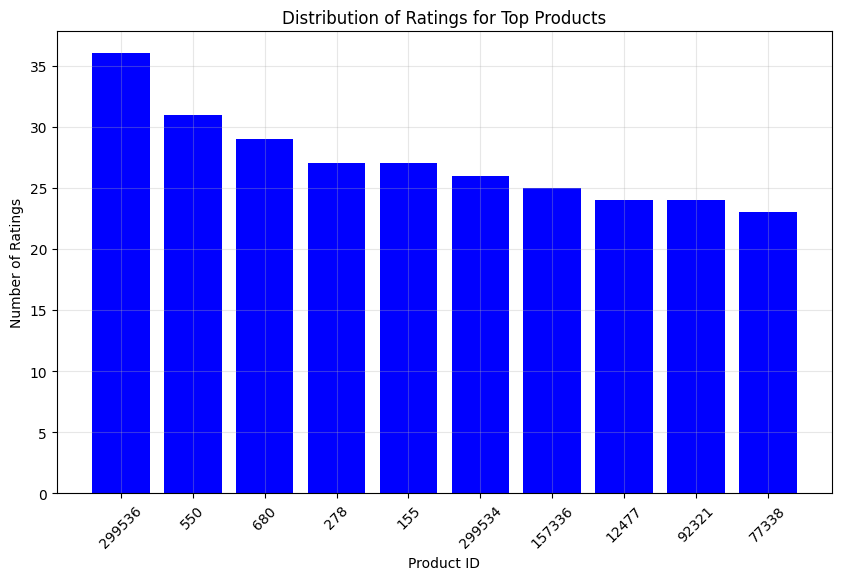

In [16]:
def count_and_plot_ratings_per_product(data):

    ratings_per_item = data.groupby('media_id')['rating'].count().sort_values(ascending=False)

    print("Top items by number of ratings:")
    print(ratings_per_item.head())

    top_rated_products = ratings_per_item.head(10)

    plt.figure(figsize=(10, 6))
    plt.bar(top_rated_products.index.astype(str), top_rated_products.values, color='blue')
    plt.title("Distribution of Ratings for Top Products")
    plt.xlabel("Product ID")
    plt.ylabel("Number of Ratings")
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.show()

    return ratings_per_item

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

ratings_per_item = count_and_plot_ratings_per_product(dataset)

### Select Three Users

In [17]:
user_item_matrix = dataset.pivot(index='user_id', columns='media_id', values='rating')
print("User-Item Matrix created:")
print(user_item_matrix.head())

User-Item Matrix created:
media_id  13       28       73       101      105      120      121      \
user_id                                                                   
1            3.72      NaN      NaN      NaN      NaN     2.44      NaN   
2            2.44      NaN      NaN      NaN      NaN     3.88      NaN   
3            2.12      NaN      NaN      NaN      NaN     2.28      NaN   
4            3.88      NaN      NaN      NaN      NaN     3.72      NaN   
5            3.72      NaN      NaN      NaN      NaN     1.96      NaN   

media_id  122      128      129      ...  572154   630566   637920   644479   \
user_id                              ...                                       
1             NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
2             NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
3             NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
4             NaN      NaN      NaN  ...      Na

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [18]:
def select_users_with_specific_missing_ratings(matrix):

    missing_ratings = matrix.isna().sum(axis=1)

    if len(missing_ratings) < 3:
        raise ValueError("Not enough users in the dataset to select 3 distinct users.")

    U1 = missing_ratings.iloc[(missing_ratings - 2).abs().argsort()].index[0]
    U2 = missing_ratings.iloc[(missing_ratings - 3).abs().argsort()].index[1]
    U3 = missing_ratings.iloc[(missing_ratings - 5).abs().argsort()].index[2]

    selected_users = list({U1, U2, U3})
    print(f"Selected users: {selected_users} (closest to 2, 3, and 5 missing ratings).")
    return selected_users

selected_users = select_users_with_specific_missing_ratings(user_item_matrix)

Selected users: [64, 36, 60] (closest to 2, 3, and 5 missing ratings).


### Select Two Items

In [19]:
def select_items_with_specific_missing_ratings(matrix):

    total_users = matrix.shape[0]

    missing_ratings_count = matrix.isna().sum(axis=0)
    missing_ratios = (missing_ratings_count / total_users) * 100

    I1 = missing_ratios.iloc[(missing_ratios - 4).abs().argsort()].index[0]
    I2 = missing_ratios.iloc[(missing_ratios - 10).abs().argsort()].index[0]

    selected_items = [I1, I2]
    print(f"Selected items: I1={I1} (closest to 4%), I2={I2} (closest to 10%).")
    return selected_items

selected_items = select_items_with_specific_missing_ratings(user_item_matrix)

Selected items: I1=299536 (closest to 4%), I2=299536 (closest to 10%).


### Count Co-Rated Items

In [20]:
def count_co_rated_items_with_overlap(matrix, selected_users):
    co_rated_counts = {}

    for user in selected_users:
        user_items = set(matrix.loc[user].dropna().index)

        no_common_users = 0
        no_coRated_items = len(user_items)

        print(f"\nItems rated by User {user}: {user_items}")

        for other_user in matrix.index:
            if user != other_user:
                other_user_items = set(matrix.loc[other_user].dropna().index)
                shared_items = user_items.intersection(other_user_items)

                if len(shared_items) == 0:
                    no_common_users += 1
                else:
                    print(f"User {user} and User {other_user} share {len(shared_items)} items: {shared_items}")

        co_rated_counts[user] = {
            'No_common_users': no_common_users,
            'No_coRated_items': no_coRated_items
        }

    print(f"\nCo-rated counts for selected users: {co_rated_counts}")
    return co_rated_counts

co_rated_counts = count_co_rated_items_with_overlap(user_item_matrix, selected_users)


Items rated by User 64: {10376, 299534, 299536, 914, 539, 550, 680, 12477, 4935, 14537, 12493, 11216, 346, 761053, 101, 105, 238, 497, 496243, 637}
User 64 and User 1 share 4 items: {680, 299536, 550, 299534}
User 64 and User 2 share 4 items: {680, 299536, 550, 299534}
User 64 and User 3 share 4 items: {680, 299536, 550, 299534}
User 64 and User 4 share 4 items: {680, 299536, 550, 299534}
User 64 and User 5 share 4 items: {680, 299536, 550, 299534}
User 64 and User 6 share 4 items: {680, 299536, 550, 299534}
User 64 and User 7 share 4 items: {680, 299536, 550, 299534}
User 64 and User 8 share 4 items: {680, 299536, 550, 299534}
User 64 and User 9 share 4 items: {680, 299536, 550, 299534}
User 64 and User 10 share 4 items: {680, 299536, 550, 299534}
User 64 and User 11 share 6 items: {550, 4935, 12493, 299536, 497, 914}
User 64 and User 12 share 2 items: {105, 299534}
User 64 and User 13 share 4 items: {497, 637, 299534, 4935}
User 64 and User 14 share 4 items: {10376, 346, 539, 238}
U

### Generate 2D Array

In [21]:
def generate_2d_array(co_rated_counts):

    matrix = np.array([
        [count['No_common_users'], count['No_coRated_items']]
        for count in co_rated_counts.values()
    ])

    print("\nGenerated 2D Array of co-rated counts (rows=users, columns=['No_common_users', 'No_coRated_items']):")
    print(matrix)
    return matrix

co_rated_matrix = generate_2d_array(co_rated_counts)


Generated 2D Array of co-rated counts (rows=users, columns=['No_common_users', 'No_coRated_items']):
[[ 0 20]
 [ 2 20]
 [ 2 20]]


### Plot Ratings Distribution

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

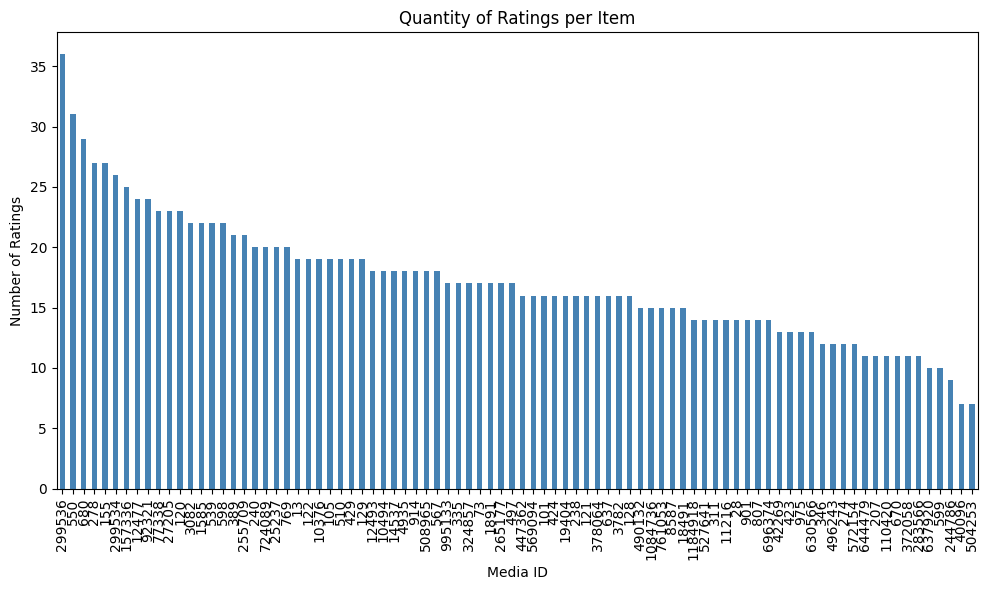

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [22]:
def plot_ratings_distribution(ratings_per_item):
    """
    Plot the quantity of ratings for every item in the dataset.
    """
    plt.figure(figsize=(10, 6))
    ratings_per_item.plot(kind='bar', color='steelblue')
    plt.title("Quantity of Ratings per Item")
    plt.xlabel("Media ID")
    plt.ylabel("Number of Ratings")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_ratings_distribution(ratings_per_item)

## Part 3: User-Based CF (Case Studies 1.1, 1.2, 1.3)

### Prepare User-Item Matrix

In [23]:
def prepare_user_item_matrix(data, user_column='user_id', item_column='media_id', rating_column='rating'):

    required_columns = {user_column, item_column, rating_column}
    if not required_columns.issubset(data.columns):
        raise ValueError(f"Dataset must contain the following columns: {required_columns}")

    user_item_matrix = data.pivot(index=user_column, columns=item_column, values=rating_column)

    print(f"User-Item matrix created with shape {user_item_matrix.shape} and {user_item_matrix.isna().sum().sum()} missing values.")

    return user_item_matrix

user_item_matrix = prepare_user_item_matrix(dataset)

print("User-Item Matrix (Preview):")
print(user_item_matrix.head())

User-Item matrix created with shape (100, 86) and 7122 missing values.
User-Item Matrix (Preview):
media_id  13       28       73       101      105      120      121      \
user_id                                                                   
1            3.72      NaN      NaN      NaN      NaN     2.44      NaN   
2            2.44      NaN      NaN      NaN      NaN     3.88      NaN   
3            2.12      NaN      NaN      NaN      NaN     2.28      NaN   
4            3.88      NaN      NaN      NaN      NaN     3.72      NaN   
5            3.72      NaN      NaN      NaN      NaN     1.96      NaN   

media_id  122      128      129      ...  572154   630566   637920   644479   \
user_id                              ...                                       
1             NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
2             NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
3             NaN      NaN      NaN  ...      NaN      

### Compute Cosine Similarity

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_cosine_similarity(matrix, adjust_bias=False):

    if adjust_bias:
        matrix = matrix.sub(matrix.mean(axis=1), axis=0).fillna(0)
    else:
        matrix = matrix.fillna(0)
    similarity_matrix = cosine_similarity(matrix)

    similarity_df = pd.DataFrame(similarity_matrix, index=matrix.index, columns=matrix.index)

    print(f"Cosine similarity computed. Adjust Bias: {adjust_bias}. Shape: {similarity_df.shape}.")
    return similarity_df

cosine_similarity_no_bias = compute_cosine_similarity(user_item_matrix, adjust_bias=False)

cosine_similarity_with_bias = compute_cosine_similarity(user_item_matrix, adjust_bias=True)

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

Cosine similarity computed. Adjust Bias: False. Shape: (100, 100).
Cosine similarity computed. Adjust Bias: True. Shape: (100, 100).


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

### Compute Pearson Correlation Coefficient (PCC)


In [25]:
from scipy.stats import pearsonr
import numpy as np
import pandas as pd

def compute_pcc_similarity(matrix):

    matrix = matrix.fillna(0)

    num_users = matrix.shape[0]
    similarity_matrix = np.zeros((num_users, num_users))

    for i, user_i in enumerate(matrix.index):
        for j, user_j in enumerate(matrix.index):
            if i != j:
                similarity_matrix[i, j], _ = pearsonr(matrix.loc[user_i], matrix.loc[user_j])
            else:
                similarity_matrix[i, j] = 1
    similarity_df = pd.DataFrame(similarity_matrix, index=matrix.index, columns=matrix.index)

    print(f"PCC similarity computed. Shape: {similarity_df.shape}.")
    return similarity_df

pcc_similarity = compute_pcc_similarity(user_item_matrix)

PCC similarity computed. Shape: (100, 100).


### Find Top-N Closest Users

In [26]:
def find_top_n_users(similarity_matrix, active_user, n=20):

    if active_user not in similarity_matrix.index:
        raise ValueError(f"Active user {active_user} not found in the similarity matrix.")

    sorted_users = similarity_matrix.loc[active_user].sort_values(ascending=False)

    top_n_users = sorted_users.iloc[1:n+1].index.tolist()

    print(f"Top {n} closest users to User {active_user}: {top_n_users}")
    return top_n_users

active_user = 1
top_n_users = find_top_n_users(cosine_similarity_no_bias, active_user, n=20)

Top 20 closest users to User 1: [6, 3, 2, 7, 4, 10, 5, 9, 8, 23, 32, 81, 52, 45, 87, 97, 49, 65, 79, 21]


### Predict Missing Ratings

In [27]:
def predict_ratings(matrix, similarity_matrix, active_user, top_n_users):

    user_ratings = matrix.loc[active_user]
    predictions = {}

    for item in user_ratings[user_ratings.isna()].index:
        numerator = 0
        denominator = 0

        for neighbor in top_n_users:
            weight = similarity_matrix.loc[active_user, neighbor]
            neighbor_rating = matrix.loc[neighbor, item]

            if not np.isnan(neighbor_rating):
                numerator += weight * neighbor_rating
                denominator += abs(weight)

        predictions[item] = numerator / denominator if denominator != 0 else np.nan

    predictions = {item: pred for item, pred in predictions.items() if not np.isnan(pred)}

    print(f"Predicted ratings for User {active_user}: {predictions}")
    return predictions

predicted_ratings = predict_ratings(user_item_matrix, cosine_similarity_no_bias, active_user, top_n_users)

Predicted ratings for User 1: {73: 2.5998479867546087, 101: 2.890216498643992, 105: 3.0922608685588013, 121: 3.08, 122: 4.52, 128: 3.72, 129: 2.8169008273459655, 207: 2.76, 238: 5.0, 240: 2.211509426704894, 274: 2.783089529241194, 311: 3.08, 335: 2.28, 346: 2.597008283191495, 389: 2.523912697309279, 423: 3.442936089688779, 424: 3.2232664122029044, 429: 2.8006994889021746, 539: 2.778259700206886, 567: 2.8785233350996515, 598: 3.4157615723520682, 637: 1.551442688656039, 769: 2.97932553911682, 807: 3.2859736360374137, 901: 1.32, 975: 1.7645819947171746, 1585: 3.72, 3082: 3.4144107760852678, 3782: 3.058728285896456, 4935: 3.08, 8587: 2.466861917005053, 10376: 4.36, 10494: 1.32, 11216: 2.164653044444833, 12477: 1.48, 12493: 3.2290683324267384, 14537: 3.3279745717039066, 18491: 3.9673883881408316, 19404: 3.883541151549017, 25237: 1.8064267191918484, 77338: 3.24, 92321: 2.2391873054781226, 110420: 2.354959113045408, 244786: 2.28, 255709: 2.0202395475123924, 265177: 1.8226784101134272, 283566:

### Apply Discount Factor

In [28]:
def apply_discount_factor(similarity_matrix, threshold_beta):
    """
    Apply a discount factor to the similarity matrix based on a given threshold beta.

    Parameters:
        similarity_matrix (pd.DataFrame): A similarity matrix with users/items as both rows and columns.
        threshold_beta (float): The minimum similarity value to retain; lower values are set to 0.

    Returns:
        pd.DataFrame: A discounted similarity matrix with values below the threshold set to 0.
    """
    if not (0 <= threshold_beta <= 1):
        raise ValueError("Threshold beta must be between 0 and 1.")

    discounted_similarity = similarity_matrix.copy()

    discounted_similarity[discounted_similarity < threshold_beta] = 0

    print(f"Discount factor applied. Threshold beta: {threshold_beta}. Shape: {discounted_similarity.shape}.")
    return discounted_similarity

threshold_beta_low = 0.2
discounted_similarity_low = apply_discount_factor(cosine_similarity_no_bias, threshold_beta_low)

threshold_beta_high = 0.4
discounted_similarity_high = apply_discount_factor(cosine_similarity_no_bias, threshold_beta_high)

Discount factor applied. Threshold beta: 0.2. Shape: (100, 100).
Discount factor applied. Threshold beta: 0.4. Shape: (100, 100).


### Compare Results

In [29]:
def compare_results(matrix, similarity_matrices, active_user, top_n_users):

    predictions_summary = {}

    for matrix_name, similarity_matrix in similarity_matrices.items():
        predictions = predict_ratings(matrix, similarity_matrix, active_user, top_n_users)
        predictions_summary[matrix_name] = predictions

    all_items = list(set().union(*[pred.keys() for pred in predictions_summary.values()]))  # Convert set to list
    comparison_df = pd.DataFrame(
        {matrix_name: [predictions.get(item, float('nan')) for item in all_items]
         for matrix_name, predictions in predictions_summary.items()},
        index=all_items
    )
    comparison_df.index.name = 'Item'
    comparison_df.reset_index(inplace=True)

    print("\nFull Comparison of Predictions Across Similarity Matrices:")
    pd.set_option("display.max_rows", None)
    print(comparison_df)

    return comparison_df

similarity_matrices = {
    'Original': cosine_similarity_no_bias,
    'Low-Beta': discounted_similarity_low,
    'High-Beta': discounted_similarity_high
}
comparison_df = compare_results(user_item_matrix, similarity_matrices, active_user, top_n_users)

Predicted ratings for User 1: {73: 2.5998479867546087, 101: 2.890216498643992, 105: 3.0922608685588013, 121: 3.08, 122: 4.52, 128: 3.72, 129: 2.8169008273459655, 207: 2.76, 238: 5.0, 240: 2.211509426704894, 274: 2.783089529241194, 311: 3.08, 335: 2.28, 346: 2.597008283191495, 389: 2.523912697309279, 423: 3.442936089688779, 424: 3.2232664122029044, 429: 2.8006994889021746, 539: 2.778259700206886, 567: 2.8785233350996515, 598: 3.4157615723520682, 637: 1.551442688656039, 769: 2.97932553911682, 807: 3.2859736360374137, 901: 1.32, 975: 1.7645819947171746, 1585: 3.72, 3082: 3.4144107760852678, 3782: 3.058728285896456, 4935: 3.08, 8587: 2.466861917005053, 10376: 4.36, 10494: 1.32, 11216: 2.164653044444833, 12477: 1.48, 12493: 3.2290683324267384, 14537: 3.3279745717039066, 18491: 3.9673883881408316, 19404: 3.883541151549017, 25237: 1.8064267191918484, 77338: 3.24, 92321: 2.2391873054781226, 110420: 2.354959113045408, 244786: 2.28, 255709: 2.0202395475123924, 265177: 1.8226784101134272, 283566:

## Part 4: Item-Based CF (Case Studies 2.1, 2.2, 2.3)